# __Ensemble Learning__

## __Agenda__

- Introduction to ensemble learning
    * Goals of ensemble learning
    * Importance of ensemble learning
    * Weak and Strong learners in Ensemble learning
- Categories in ensemble learning
    * Sequential ensemble technique
    * Parallel ensemble technique
- Simple techniques used in ensemble learning
    * Voting
        * Hard Voting
        * Soft Voting
    * Averaging
    * Weighted Averaging
- Advanced techniques used in ensemble learning
    * Bagging (bootstrap aggregating)
        * Bagging Techniques
        * Advantages of bagging
        * Disadvantages of bagging
        * Out-of-bag (OOB) concept
    * Boosting
        * Boosting Techniques
        * Advantages of boosting
        * Disadvantages of boosting
    * Stacking
        * Advantages of stacking
        * Disadvantages of stacking



## __1. Introduction to Ensemble Learning__

Ensemble learning combines multiple models to enhance the overall performance of machine learning algorithms. The fundamental principle of ensemble learning is combining predictions from multiple individual models to produce a more accurate and robust prediction than any single model.

### __1.1 Goals of Ensemble Learning__

- Enhance predictive accuracy by combining multiple models.
- Improve model robustness and generalization performance.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/ensemble_learning.png)

__Example:__ Imagine you are deciding whether to go outside based on weather predictions. Instead of relying on just one weather forecast, you check multiple sources, like the weather app, a meteorologist's report, and a weather website. You then combine these predictions to make your decision.

This process mirrors ensemble learning, where combining multiple models (or weather forecasts) results in a more accurate prediction (or decision) than any single model could offer.

 ### __1.2 Importance of Ensemble Learning__

- Improves prediction performance by combining diverse models
- Enhances model resilience and robustness against uncertainties
- Mitigates biases and errors present in individual models
- Captures a wide range of perspectives to achieve better performance
- Provides reliable and robust forecasts across various domains, ensuring more dependable outcomes

 ### __1.3 Weak and Strong learners in Ensemble Learning__
- A **Weak learner** (WL) or **Base learner** is a learning algorithm
capable of producing classifiers with probability of error strictly (but only slightly) less than that of random guessing (0.5, in the case of binary)

- On the other hand, **Strong learner** (SL) is able (given enough training data) to yield classifiers with arbitrarily small error probability. It performs much better than random guessing.
  
An ensemble (or committee) of classifiers is a classifier build upon some
combination of Weak learner. The strategy of boosting, and ensembles of classifiers, is to learn many weak classifiers and combine them, instead of trying to learn a single Strong learner

## __2. Categories in Ensemble Learning__

Ensemble learning can be broadly classified into two categories:
- Sequential ensemble technique
- Parallel ensemble technique

### __2.1 Sequential Ensemble Technique__

These techniques train models sequentially, with each model attempting to correct its predecessor's errors. This technique focuses on improving the overall performance of the ensemble by iteratively refining predictions. An example of this approach is boosting.

__Note:__ It typically employs weak learners as base estimators because these learners initially have higher error rates.

The steps involved in the sequential ensemble technique depend on the data structure and the requirements of the application. They are:
1. __Base Model Selection__: Choose the initial model.
2. __Sequential Training__: Train models one after the other.
3. __Error Correction__: Each model learns from previous mistakes.
4. __Prediction Refinement__: Iteratively refine predictions.
5. __Combining Predictions__: Combine predictions from all models.
6. __Evaluation__: Assess ensemble performance using metrics.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Sequential_Ensemble_Technique.png)

__Note:__ If all four base models are of the same type, it is considered to be a homogeneous ensemble. If they are different, it is considered heterogeneous.

The diagram above shows the training data divided into four samples, with each sample trained on a distinct base model. Insights gained from model M1 are passed to model M2 alongside sample S2. M2 then adjusts its weights and biases based on the outcomes of M1. This process repeats for models 2, 3, and 4. Finally, all the learners are combined using a weighted averaging strategy.

The summation sign ($ ∑ $) indicates the function that adjusts the model to improve its overall performance.

__The sequential ensemble technique is employed when dealing with:__
- Complex relationships between input features and the target variable
- Diverse data types, including numerical, categorical, and textual data
- Imbalanced datasets, where skewed class distributions pose classification challenges.
- Incremental updates are needed to adapt models gradually to evolving data over time

### __2.2 Parallel Ensemble Technique__

The parallel ensemble technique concurrently trains models. They combine the predictions from multiple models to improve the final output. Bagging and Random Forest algorithms are examples of parallel ensemble techniques.

__Note:__  It employs stronger learners as base estimators.

The steps involved in the parallel ensemble technique are:

1. __Data Partitioning__: Divide the dataset into subsets
2. __Model Training__: Train models concurrently on subsets
3. __Prediction__: Models make independent predictions
4. __Combining Predictions__: Aggregate predictions using techniques like voting or averaging
5. __Evaluation__: Assess ensemble performance using metrics


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Parallel_Ensemble_Technique.png)

In the above diagram, the training data is divided into four samples, labeled S1 to S4, each trained on a distinct base model (M1 to M4). Unlike the sequential ensemble technique, the data in the base learners is independent. This independence of base learners significantly reduces the error due to the application of averages.

The summation sign ($ ∑ $) indicates the aggregated model with improved performance, which has been learned from all independent base models, M1 to M4.

The parallel ensemble technique is used to:

- Enhance scalability, allowing for the efficient processing of large volumes of data by distributing the workload
-  Expedite training and prediction processes through parallel computation on multi-core systems.
- Reduce susceptibility to noise and overfitting by averaging out individual model errors.
- Capture diverse data patterns effectively by utilizing different models trained on varied data subsets

## __3. Simple Techniques used in Ensemble Learning__

* Voting
* Averaging
* Weighted Averaging




## __3.1 Voting__

Voting is one of the fundamental methods of ensemble learning. It involves aggregating the predictions from multiple models to arrive at a final prediction.
Two common types of voting in ensemble learning are:
* Majority voting/Hard voting
* Weighted voting/Soft voting.



In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#1. Load data
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
# 2. Base learners

classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC(kernel='poly', degree=5, probability=True))
]

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(probability=True)

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
svm.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_svm = svm.predict(X_test)

print("Test Accuracy of Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Test Accuracy of Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Test Accuracy of SVM:", accuracy_score(y_test, y_pred_svm))

Test Accuracy of Logistic Regression: 0.9777777777777777
Test Accuracy of Decision Tree: 0.9333333333333333
Test Accuracy of SVM: 0.7111111111111111


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
0.9333333333333333  /(0.9777777777777777 + 0.9333333333333333 + 0.7111111111111111)

0.35744680851063837

In [ ]:
# 3. Ensemble
vc = VotingClassifier(estimators=classifiers,
                      voting='soft',
                      weights=[0.374468085106383, 0.35744680851063837, 0.27234042553191495])
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.9777777777777777


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### __3.1.1 Majority Voting/Hard Voting__

Majority Voting or Hard Voting is an ensemble learning classification technique. It involves multiple models, making predictions for each data point. Each model's prediction is considered a __vote__. The final prediction is determined by the majority vote among the models.

__Example:__
    
- Majority Voting ensemble works on breast cancer classification by combining predictions from multiple individual classifiers, such as Logistic Regression, Decision Tree, and Support Vector Machine.
- Each classifier provides its prediction for whether a given sample belongs to a certain class. The voting ensemble then aggregates these predictions using a voting mechanism.
- The final prediction is determined based on the most commonly predicted class among all classifiers.
- This approach leverages the collective wisdom of diverse models to improve overall prediction accuracy and robustness in breast cancer classification tasks.    

Let's look at an implementation of majority voting using a breast cancer classification dataset.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score


In [ ]:
# Load the dataset from the specified URL and assign column names to the DataFrame
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']

In [ ]:
# Drop the 'Sample code' column as it's not required for prediction
data.drop(['Sample code'], axis=1, inplace=True)

# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)

In [ ]:
# Convert the 'Bare Nuclei' column to an integer type to ensure a uniform data type across the column,
# which is essential for consistent data manipulation and analysis.
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

In [ ]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

In [ ]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   Class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [ ]:
# Extract features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column as the target variable

In [ ]:
# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [ ]:
# Create an instance of SimpleImputer to fill in missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [ ]:
# Create an instance of MinMaxScaler to scale features to a range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize list for base models
estimators = [
    ('logistic', LogisticRegression()),
    ('cart', DecisionTreeClassifier()),
    ('svm', SVC())
]



In [ ]:
# Create Voting Classifier ensemble with estimators
ensemble = VotingClassifier(estimators, voting="hard")

# Set up KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=7)

# Evaluate ensemble model using cross-validation
results = cross_val_score(ensemble, X_train_scaled, y_train, cv=kfold)

# Print mean accuracy score of the ensemble model
print(f"Mean cross-validation accuracy of the ensemble model: {results.mean():.2f}")

# Fit the ensemble on the scaled training set and evaluate on the scaled test set
ensemble.fit(X_train_scaled, y_train)
test_accuracy = ensemble.score(X_test_scaled, y_test)

# Print test accuracy
print(f"Test accuracy of the ensemble model: {test_accuracy:.2f}")

Mean cross-validation accuracy of the ensemble model: 0.96
Test accuracy of the ensemble model: 0.96


**Observation:**

The majority voting ensemble's 96% accuracy rate demonstrates its remarkable effectiveness in predicting breast cancer classifications. By combining predictions from multiple individual classifiers, this ensemble leverages the collective insights of diverse models to achieve highly accurate results.

Let us explore other performance evaluation metrics as well:

-------Classification report--------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

-------Confusion matrix-------------


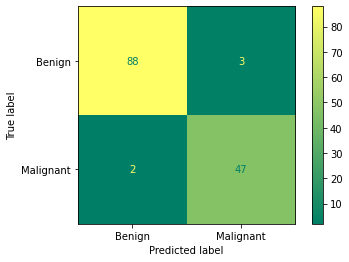

In [ ]:
## evaluating model on test dataset
y_pred = ensemble.predict(X_test_scaled)
print('-------Classification report--------')
print(classification_report(y_test,y_pred))
print('-------Confusion matrix-------------')

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign','Malignant'])
disp.plot(cmap="summer")
plt.show()


#### __Observation:__

True Positives (TP): The model correctly predicted 47 instances as "malignant" when they were indeed malignant. This indicates that there were 41 true positive predictions.

True Negatives (TN): The model correctly predicted 88 instances as "benign" when they were indeed benign. This shows 70 true negative predictions.

False Positives (FP): The model incorrectly predicted 3 instance as "malignant" when it was actually benign. This is a false positive, also known as a Type I error.

False Negatives (FN): The model incorrectly predicted 2 instances as "benign" when they were actually malignant. This is a false negative, also known as a Type II error.

**Classification Report:**

*Class 0 (Negative Class)*

Precision: 0.98

98% of the instances predicted as class 0 are actually class 0.

Recall: 0.97

97% of the actual class 0 instances are correctly predicted as class 0.

F1-Score: 0.97

The F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. Here, the F1-score is 0.97, indicating excellent performance.

Support: 91

There are 91 actual instances of class 0 in the test set.

*Class 1 (Positive Class)*

Precision: 0.94

94% of the instances predicted as class 1 are actually class 1.

Recall: 0.96

96% of the actual class 1 instances are correctly predicted as class 1.

F1-Score: 0.95

The F1-score for class 1 is 0.95, indicating very good performance.

Support: 49

There are 49 actual instances of class 1 in the test set.

*Overall Metrics*

Accuracy: 0.96

The overall accuracy of the model, indicating that 97% of the total instances are correctly classified.

Macro Average

Macro average calculates the metric independently for each class and then takes the average, treating all classes equally. It is useful when you have imbalanced classes.

Precision: 0.96
Recall: 0.96
F1-Score: 0.96

Weighted Average

Weighted average takes into account the support (the number of true instances for each class) to calculate the average. It is more representative of the performance on imbalanced datasets.

Precision: 0.96
Recall: 0.96
F1-Score: 0.96

### __3.1.2 Weighted Voting/Soft Voting__

Soft voting takes into account the probability estimates for each class provided by the models, assuming the models are capable of estimating these probabilities (i.e., they have a predict_proba method). The final prediction is determined by averaging these probabilities across all models, and the class with the highest average probability is selected.

### **Implementation of Hard and Soft Voting for comparison**



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
# Load the Wisconsin Breast Cancer dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
data = pd.read_csv(url, header=None, na_values='?')
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']

In [ ]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

In [ ]:
# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)

# Convert object type column to numeric
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

In [ ]:
# Features and target
# `Sample code`(0th column) is exempted when creating X
X = data.iloc[:, 1:-1]
y = data['Class']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

- `make_pipeline`: Construct a Pipeline from the given estimators.


In [ ]:
# Imputation to handle missing values
imputer = SimpleImputer(strategy='median')

# Define the base models with standard scaling and imputation
model1 = make_pipeline(imputer, StandardScaler(), LogisticRegression(random_state=1, max_iter=10000))
model2 = make_pipeline(imputer, StandardScaler(), DecisionTreeClassifier(random_state=1))
model3 = make_pipeline(imputer, StandardScaler(), SVC(probability=True, random_state=1))

# Define k-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Create an ensemble of models for hard voting
hard_voting_classifier = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('svc', model3)],
    voting='hard'
)

In [ ]:
# Cross-validation on the training data
hard_cv_scores = cross_val_score(hard_voting_classifier, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Hard Voting - Mean CV Accuracy: {hard_cv_scores.mean():.4f}")

# Fit and evaluate on the test data
hard_voting_classifier.fit(X_train, y_train)
y_pred_hard = hard_voting_classifier.predict(X_test)
hard_test_accuracy = hard_voting_classifier.score(X_test, y_test)
print(f"Hard Voting - Test Accuracy: {hard_test_accuracy:.4f}")

# Additional evaluation metrics for hard voting classifier
print("Hard Voting - Classification Report")
print(classification_report(y_test, y_pred_hard))
print("Hard Voting - Confusion Matrix:-")
print(confusion_matrix(y_test, y_pred_hard))
print("----------------------------------------------")
# Create and evaluate a soft voting classifier
soft_voting_classifier = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('svc', model3)],
    voting='soft'
)

# Cross-validation on the training data
soft_cv_scores = cross_val_score(soft_voting_classifier, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Soft Voting - Mean CV Accuracy: {soft_cv_scores.mean():.4f}")

# Fit and evaluate on the test data
soft_voting_classifier.fit(X_train, y_train)
y_pred_soft = soft_voting_classifier.predict(X_test)
soft_test_accuracy = soft_voting_classifier.score(X_test, y_test)
print(f"Soft Voting - Test Accuracy: {soft_test_accuracy:.4f}")

# Additional evaluation metrics for soft voting classifier
print("Soft Voting - Classification Report:-")
print(classification_report(y_test, y_pred_soft))
print("Soft Voting - Confusion Matrix")
print(confusion_matrix(y_test, y_pred_soft))

Hard Voting - Mean CV Accuracy: 0.9659
Hard Voting - Test Accuracy: 0.9643
Hard Voting - Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Hard Voting - Confusion Matrix:-
[[88  3]
 [ 2 47]]
----------------------------------------------
Soft Voting - Mean CV Accuracy: 0.9624
Soft Voting - Test Accuracy: 0.9643
Soft Voting - Classification Report:-
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Soft Voting - Confusion

### __3.2 Averaging__

The averaging technique is used mainly for regression problems. In this method, the predictions of multiple models are averaged to obtain the final prediction. This technique helps reduce variance and produces a more stable prediction.

__Example:__

- Averaging ensemble works by combining the predictions from multiple classifiers trained on the dataset.
- These classifiers, such as Logistic Regression, Decision Tree, and Support Vector Machine, provide individual predictions for each data point.
- Then it takes the average of these predictions to form a final prediction.
- This approach helps to mitigate biases and uncertainties inherent in individual models, leading to a more accurate prediction of breast cancer classifications.

**Note:** X and y from the previous dataset is  used for the implementation

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create an instance of SimpleImputer to fill in missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create an instance of MinMaxScaler to scale features to a range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [ ]:
# Initialize classifiers
LogReg_clf = LogisticRegression()
Dtree_clf = DecisionTreeClassifier()
svc_clf = SVC(probability=True)  # Enable probability for SVC


In [ ]:
# Train classifiers on the training dataset
LogReg_clf.fit(X_train_scaled, y_train)
Dtree_clf.fit(X_train_scaled, y_train)
svc_clf.fit(X_train_scaled, y_train)

# Generate probability predictions for the positive class from each classifier on the test set
LogReg_prob = LogReg_clf.predict_proba(X_test_scaled)[:, 1]
Dtree_prob = Dtree_clf.predict_proba(X_test_scaled)[:, 1]
svc_prob = svc_clf.predict_proba(X_test_scaled)[:, 1]



In [ ]:
# Average the probability predictions
avg_probs = np.mean([LogReg_prob, Dtree_prob, svc_prob], axis=0)

# Convert averaged probabilities to class predictions based on a threshold
avg_preds = (avg_probs > 0.5).astype(int)

# Evaluate the accuracy of the averaged predictions on the test set
accuracy = accuracy_score(y_test, avg_preds)

# Print the accuracy
print("Accuracy of averaged model predictions on test data:", accuracy)

Accuracy of averaged model predictions on test data: 0.9571428571428572


The averaging ensemble achieves an accuracy of 95%, slightly lower than the max voting ensemble. However, this accuracy rate still underscores the effectiveness of the averaging ensemble in breast cancer classification.

### __3.3 Weighted Averaging__

Weighted averaging assigns different weights to each model’s prediction, reflecting its importance or reliability. The final prediction is a weighted average, which can be more effective than simple averaging because it considers each model's performance.

__Example:__

- In medical diagnosis, weighted ensemble learning combines results from various diagnostic tests with different reliabilities.
- Each test's result is weighted based on its importance. For instance, blood tests, imaging scans, and physical examinations' results are combined to determine a patient's diagnosis accurately and reliably.

By weighting and averaging results from multiple diagnostic tests, you can determine the final diagnosis, thereby enhancing diagnostic accuracy and reliability. This highlights the significance of weighted averaging for improving decision-making.

## __4. Advanced Techniques for Ensemble Learning__

These techniques use complex methods to merge predictions from many individual models. It aims for better predictive accuracy. They are employed for complex problems where high predictive accuracy is crucial, such as in financial forecasting, medical diagnosis, and natural language processing applications.

### __4.1 Bagging__

Bagging or Bootstrap Aggregating enhances the stability and accuracy of machine learning algorithms. This method creates multiple subsets from the original dataset, known as bootstrap samples, by selecting data points with replacement. Each subset trains a separate model.

For final predictions, Bagging combines the individual models' outputs by using voting (for classification tasks) or averaging (for regression tasks). This approach effectively reduces variance and helps prevent overfitting.

__Note:__ Random Forest is a popular algorithm that utilizes bagging by training multiple decision trees on different bootstrap samples and combining their predictions.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Ensembled_Learning_Bagging.png)

__Note:__ The numbering shown in the above image outlines the specific workflow for bagging.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the Pima Indians Diabetes dataset using the given URL and assign the names

url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)

# Check the head of the data using the head() method
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Create a feature matrix X and a target vector y


In [ ]:
# Assign all the rows up to the 8th column of the data to X
X = data.iloc[:,0:8].values

# Assign the 9th column of the same data to Y
y = data["class"].values

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create an instance of SimpleImputer to fill in missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create an instance of MinMaxScaler to scale features to a range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


In [ ]:
# Set up the k-fold cross-validation with n_splits to 10
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

# Create a decision tree classifier named cart
cart = DecisionTreeClassifier()

# The estimator will be set to 100, which is equal to the number of trees
num_trees = 100

#### __Apply the bagging technique__

* `oob_score`: This is a method of measuring the prediction error of random forests, bagging, and other ensemble methods that involve bootstrap aggregating

We'll talk about it in detail below

In [ ]:
# Create a bagging classifier with the decision tree classifier (cart) as the base estimator
# Ensure oob_score is enabled
bagging_model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=12, oob_score=True)

# Perform cross-validation using the model, feature matrix (X), target vector (y), and specified number of folds (cv)
results = model_selection.cross_val_score(bagging_model, X_train_scaled, y_train, cv=kfold)

# Print the cross-validation results
print(results)

[0.79032258 0.67741935 0.75806452 0.70967742 0.86885246 0.78688525
 0.63934426 0.7704918  0.73770492 0.72131148]


__Observations:__
- The results array contains the cross-validation scores for each fold of the data.
- The cross-validation scores indicate the performance of the BaggingClassifier model on different subsets of the data.
- These scores can assess the generalization ability and performance stability of the BaggingClassifier model across multiple iterations of the training data.

In [ ]:
# Calculate the Mean Cross-Validation Score using .mean() function
mean_score = np.mean(results)

print("Mean Cross-Validation Score:", mean_score)

Mean Cross-Validation Score: 0.7460074034902168


- The provided code illustrates a bagging implementation with a DecisionTreeClassifier base estimator. It employs KFold cross-validation with 10 folds and applies BaggingClassifier with 100 decision tree estimators to each fold.
- The resultant mean cross-validation score of 0.75 demonstrates the ensemble's effectiveness in enhancing predictive performance compared to a single decision tree classifier.

___________________________Bagging Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

# Confusion matrix


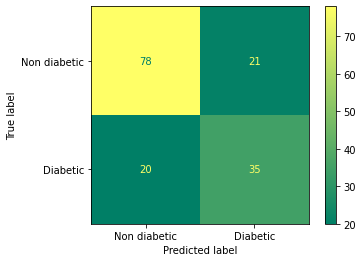

In [ ]:
# fitting  and evaluating Bagging classifier model in training and test dataset

bagging_model.fit(X_train_scaled,y_train)
print('___________________________Bagging Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = bagging_model.predict(X_test_scaled)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Non diabetic','Diabetic']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

### __4.1.1 Advantages of Bagging__

- It reduces the risk of overfitting by training on various subsets of the data.
- It improves the model's accuracy and stability.
- It works well with complex models that tend to overfit.

### __4.1.2 Disadvantages of Bagging__

- It increases computational complexity because it requires training multiple models.
- It may not significantly improve performance if the base models are already biased.

### __4.1.3  Out-Of-Bag (OOB) Concept__

In bagging, __out-of-bag (OOB)__ data refers to instances not included in the bootstrap sample for training a specific base model. Since the process trains each model on a random subset of the original data, it naturally leaves out some instances.

These OOB instances serve as a built-in validation set for each model, allowing for an assessment of the model's performance on unseen data points. You can compute the OOB error, which offers an efficient way to evaluate the model's generalization ability.

This method eliminates the need for additional validation data or cross-validation procedures.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson_07/Out_Of_Bag_Concept.png)

In the above image, Sample 1 lacks Rat and Cow, whereas Sample 3 includes all animals from the primary training set. Data points were randomly chosen with replacement during sample creation, and those omitted from a particular sample are identified as out-of-bag (OOB) points.

 - The OOB score is an estimate of performance that mimics cross-validation. It uses out-of-bag samples to estimate the model's accuracy.

 - This means that for each tree in a bagging ensemble, only the data not seen by the tree (out-of-bag data) are used to assess that tree’s performance.

In [ ]:
# Perform cross-validation and compute OOB error
oob_error = 1 - bagging_model.fit(X_train_scaled, y_train).oob_score_

print("Out-of-Bag Error:", oob_error)

Out-of-Bag Error: 0.23615635179153094


__Observations:__
- The code computes the out-of-bag (OOB) error for a BaggingClassifier model using cross-validation.
- It calculates the OOB error by subtracting the OOB score from 1.
- The **OOB score** represents the model's accuracy on out-of-bag samples.
- The OOB error provides insight into the model's performance on unseen data points, indicating the misclassification rate of the model.

### __4.2 Boosting__

Boosting is a sequential ensemble technique where each model corrects its predecessor's mistakes. The main idea is to train models sequentially, each trying to correct the errors of the previous model.

The final prediction is a weighted sum of all the models' predictions. Boosting significantly reduces bias and variance, leading to more accurate models.

__Note:__ Popular boosting algorithms include AdaBoost, Gradient Boosting Machines (GBM), and XGBoost.


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/Ensembled_Learning_Boosting.png)

__Note:__ The numbering shown in the above image specifically outlines the workflow for boosting.

#### __4.2.1 Boosting Techniques__

There are various meta-algorithms in boosting that differentiate how the base models are aggregated, such as:
* Adaboost
* Gradient Boost
* XGBoost
* CatBoost

**Meta-algorithm** (or meta-learning) involves learning algorithms that are designed to learn how to combine the predictions of multiple machine learning models, often referred to as base models or learners, to improve overall performance

#### __4.2.2. AdaBoost Algorithm__

AdaBoost, an abbreviation for adaptive boosting, stands as one of the leading boosting algorithms with widespread adoption. It focuses on classification problems, aiming to transform a collection of weak classifiers into a single strong classifier. It increases the weights of misclassified instances, directing subsequent classifiers to pay more attention to challenging cases.

**The AdaBoost algorithm follows these steps:**
1. Initially, the algorithm assigns equal weights to all observations in the dataset.
2. A model is constructed using a subset of the data.
3. Predictions are made on the entire dataset using this model.
4. The algorithm computes errors by comparing these predictions to the actual values.
5. In the subsequent model creation, the algorithm assigns higher weights to incorrectly predicted data points.
6. Weights are determined based on error values, where higher errors result in heavier observation weights.
7. This iterative process continues until the error function stabilizes or the algorithm reaches the maximum limit of estimators.



### **Implementation of Adaboost Classifier and Bagging classifier to compare the performance:**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset from the given URL and assign column names
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

In [ ]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code                  699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 94.5 KB


In [ ]:
data.describe()

,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
data['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
# Drop the 'Sample code' column as it's not required for prediction
data.drop(['Sample code'], axis=1, inplace=True)

# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)

In [ ]:
data['Class'].unique()

array([2, 4])

In [ ]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0,
                                       4: 1})

In [ ]:
# Convert the 'Bare Nuclei' column to an integer type to ensure a uniform data type across the column,
# which is essential for consistent data manipulation and analysis.
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

In [ ]:
data.isnull().mean()

,0
Sample code,0.0
Clump Thickness,0.0
Uniformity of Cell Size,0.0
Uniformity of Cell Shape,0.0
Marginal Adhesion,0.0
Single Epithelial Cell Size,0.0
Bare Nuclei,0.0
Bland Chromatin,0.0
Normal Nucleoli,0.0
Mitoses,0.0


- A SimpleImputer handles missing values in a dataset by imputing (i.e., filling in) the missing values with a specified statistic, such as the mean, median, or most frequent value of the respective feature.
- This is important because missing values can disrupt the analysis and modeling process, leading to biased results or errors in predictive models.
- Imputation helps maintain the integrity and completeness of the dataset, ensuring that the analysis or modeling algorithms can effectively utilize the available data for accurate insights or predictions.

In [ ]:
# Split data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [ ]:
# Define K-fold cross-validation
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

# Create a pipeline for AdaBoost classifier with Decision Tree base estimator
adaboost_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', AdaBoostClassifier(n_estimators=70, random_state=7))
])

# Evaluate the Adaboost Classifier pipeline using cross-validation on the training set
adaboost_results = cross_val_score(adaboost_pipeline, X_train, y_train, cv=kfold)
print("AdaBoost Classifier cross validation mean accuracy: ", adaboost_results.mean())


# Fit the Adaboost Classifier pipeline on the training set and evaluate on the test set
adaboost_pipeline.fit(X_train, y_train)
adaboost_test_score = adaboost_pipeline.score(X_test, y_test)
print("Adaboost Classifier test accuracy: ", adaboost_test_score)

adaboost_train_score = adaboost_pipeline.score(X_train, y_train)
print("Adaboost Classifier train accuracy: ", adaboost_train_score)


AdaBoost Classifier cross validation mean accuracy:  0.9534740259740259
Adaboost Classifier test accuracy:  0.9571428571428572
Adaboost Classifier train accuracy:  0.9731663685152058


___________________________Adaboost Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        91
           1       0.96      0.92      0.94        49

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

# Confusion matrix


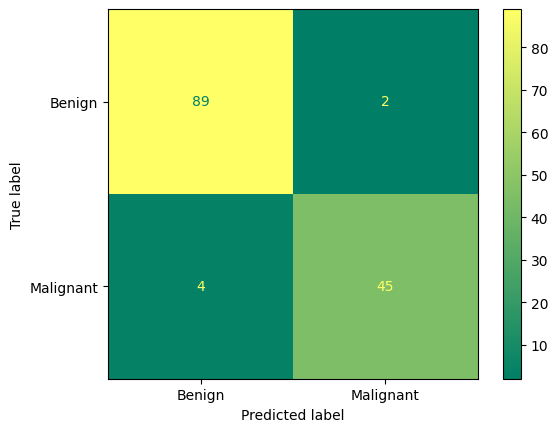

In [ ]:
# fitting  and evaluating Boosting classifier model in training and test dataset

print('___________________________Adaboost Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = adaboost_pipeline.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier(max_depth=8)

lr_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

print('Logistic Regression Test Accuracy:', lr_model.score(X_test, y_test))
print('K-Neighbors Test Training Accuracy:', knn_model.score(X_test, y_test))
print('Decision Tree Test Training Accuracy:', dt_model.score(X_test, y_test))

Logistic Regression Test Accuracy: 0.9714285714285714
K-Neighbors Test Training Accuracy: 0.9642857142857143
Decision Tree Test Training Accuracy: 0.95


__Observations:__

- This demonstrates the importance and effectiveness of AdaBoost in enhancing the predictive capability of weak learners, like decision trees.

#### __4.2.3. Gradient Boosting Machine__






Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Gradient boosting is also known as gradient tree boosting, stochastic gradient boosting (an extension), and gradient boosting machines, or GBM for short.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models

**Gradient Boosting involves three main components:**

* Loss Function: The choice of loss function depends on the type of problem being solved (e.g., regression, classification). The goal is to find a model that minimizes the loss function.

* Weak Learners: Gradient Boosting uses decision trees as the default weak learner. These trees are usually of a fixed size and depth and are created one at a time.

* Additive Model: Instead of adjusting the weights of data points like AdaBoost, Gradient Boosting fits new models to the residual errors made by previous models. Essentially, each new model is built on the errors of the whole ensemble so far.

#### __4.2.4. XGBoost__

XGBoost, or eXtreme Gradient Boosting, stands out as a premier machine learning framework, widely adopted for its proficiency in supervised learning tasks including classification, regression, and ranking. This advanced algorithm builds upon the principles of gradient boosting and is celebrated for its exceptional accuracy and scalability in handling complex predictive modeling challenges.

 **XGBoost offers many essential features that make it ideal for classification tasks. Some of the reasons include:**

* High performance: As mentioned above, XGBoost is optimized for speed and efficiency, making it appropriate for large datasets and real-time applications.

* Regularization methods: L1 (Lasso) and L2 (Ridge) regularisation terms are included in XGBoost to avoid overfitting and increase generalization.

* Handle missing data: Moreover, XGBoost can handle missing data automatically, minimizing the need for preprocessing and imputation.




#### __4.2.5. CatBoost__

Catboost is a variant of gradient boosting that can handle both categorical and numerical features. It does not require any feature encodings techniques like One-Hot Encoder or Label Encoder to convert categorical features into numerical features.

### **Implementation of XGBoost, Gradient Boost and CatBoost Algorithm:**

In [ ]:
!pip install catboost lightgbm xgboost --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset from the given URL and assign column names
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

In [ ]:
# Drop the 'Sample code' column as it's not required for prediction
data.drop(['Sample code'], axis=1, inplace=True)

# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)

In [ ]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

In [ ]:
# Convert the 'Bare Nuclei' column to an integer type to ensure a uniform data type across the column,
# which is essential for consistent data manipulation and analysis.
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

In [ ]:
# Split data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Define K-fold cross-validation
kfold = KFold(n_splits=10, random_state=7, shuffle=True)


In [ ]:
# Gradient Boosting Classifier
gb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', GradientBoostingClassifier(random_state=7))
])

# Evaluate the Gradient Boosting Classifier pipeline
gb_results = cross_val_score(gb_pipeline, X_train, y_train, cv=kfold)
print("Gradient Boosting Classifier mean accuracy after cross validation: ", gb_results.mean())

Gradient Boosting Classifier mean accuracy after cross validation:  0.9588961038961038


In [ ]:
# Fit the Gradient boosting Classifier pipeline on the training set and evaluate on the test set
gb_pipeline.fit(X_train, y_train)
gb_boost_test_score = gb_pipeline.score(X_test, y_test)
print("Gradient Boosting Classifier test accuracy: ", gb_boost_test_score)

Gradient Boosting Classifier test accuracy:  0.9571428571428572


In [ ]:
# Extreme Gradient Boosting Classifier
xgb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', XGBClassifier(random_state=7))
])

# Evaluate the Gradient Boosting Classifier pipeline
xgb_results = cross_val_score(xgb_pipeline, X_train, y_train, cv=kfold)
print("Extreme Gradient Boosting Classifier mean accuracy after cross validation: ", xgb_results.mean())

# Fit the Gradient boosting Classifier pipeline on the training set and evaluate on the test set
xgb_pipeline.fit(X_train, y_train)
xgb_boost_test_score = xgb_pipeline.score(X_test, y_test)
print("Gradient Boosting Classifier test accuracy: ", xgb_boost_test_score)

Extreme Gradient Boosting Classifier mean accuracy after cross validation:  0.9534415584415585
Gradient Boosting Classifier test accuracy:  0.95


In [ ]:
# Light Gradient Boosting Classifier
lgb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', LGBMClassifier(random_state=7, verbose=0))
])

# Evaluate the Gradient Boosting Classifier pipeline
lgb_results = cross_val_score(lgb_pipeline, X_train, y_train, cv=kfold)
print("Light Gradient Boosting Classifier mean accuracy after cross validation: ", lgb_results.mean())

# Fit the Gradient boosting Classifier pipeline on the training set and evaluate on the test set
lgb_pipeline.fit(X_train, y_train)
lgb_boost_test_score = lgb_pipeline.score(X_test, y_test)
print("Light Gradient Boosting Classifier test accuracy: ", lgb_boost_test_score)
print("Light Gradient Boosting Classifier mean accuracy after cross validation: ", lgb_results.mean())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
print("Light Gradient Boosting Classifier test accuracy: ", lgb_boost_test_score)
print("Light Gradient Boosting Classifier mean accuracy after cross validation: ", lgb_results.mean())

Light Gradient Boosting Classifier test accuracy:  0.9571428571428572
Light Gradient Boosting Classifier mean accuracy after cross validation:  0.9641883116883117


In [ ]:
# CatBoost Classifier
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', CatBoostClassifier(random_state=7))
])

# Evaluate the Gradient Boosting Classifier pipeline
cat_results = cross_val_score(cat_pipeline, X_train, y_train, cv=kfold)
print("CatBoost Classifier mean accuracy after cross validation: ", cat_results.mean())

# Fit the Gradient boosting Classifier pipeline on the training set and evaluate on the test set
cat_pipeline.fit(X_train, y_train)
cat_boost_test_score = cat_pipeline.score(X_test, y_test)


Streaming output truncated to the last 5000 lines.
5:	learn: 0.6113369	total: 7.07ms	remaining: 1.17s
6:	learn: 0.5961168	total: 12.6ms	remaining: 1.79s
7:	learn: 0.5827773	total: 13.6ms	remaining: 1.68s
8:	learn: 0.5702316	total: 14.4ms	remaining: 1.58s
9:	learn: 0.5565375	total: 15.2ms	remaining: 1.5s
10:	learn: 0.5464490	total: 16ms	remaining: 1.43s
11:	learn: 0.5344967	total: 20.8ms	remaining: 1.71s
12:	learn: 0.5222372	total: 21.7ms	remaining: 1.65s
13:	learn: 0.5100277	total: 22.6ms	remaining: 1.59s
14:	learn: 0.5011031	total: 23.5ms	remaining: 1.54s
15:	learn: 0.4896566	total: 24.2ms	remaining: 1.49s
16:	learn: 0.4780508	total: 29.3ms	remaining: 1.69s
17:	learn: 0.4701928	total: 30.2ms	remaining: 1.65s
18:	learn: 0.4601740	total: 31.1ms	remaining: 1.61s
19:	learn: 0.4504211	total: 31.9ms	remaining: 1.56s
20:	learn: 0.4406748	total: 37.8ms	remaining: 1.76s
21:	learn: 0.4317587	total: 38.7ms	remaining: 1.72s
22:	learn: 0.4232571	total: 39.6ms	remaining: 1.68s
23:	learn: 0.4170215	

In [ ]:
print("CatBoost Classifier test accuracy: ", cat_boost_test_score)
print("CatBoost Classifier mean accuracy after cross validation: ", cat_results.mean())

CatBoost Classifier test accuracy:  0.9571428571428572
CatBoost Classifier mean accuracy after cross validation:  0.9677922077922076


___________________________Gradient Boosting Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        91
           1       0.94      0.94      0.94        49

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

# Confusion matrix


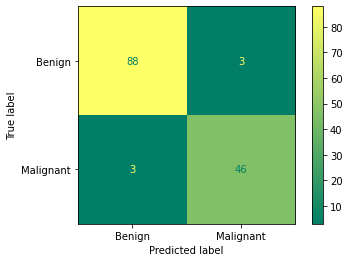

In [ ]:
# fitting  and evaluating Boosting classifier model in training and test dataset

print('___________________________Gradient Boosting Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = gb_pipeline.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

- In XGBoost, one-hot encoding is used for multi-class classification problems to transform the categorical target variables into a binary matrix format.

- This conversion is crucial for applying gradient boosting techniques effectively, allowing each model iteration to focus on optimizing classification accuracy across potentially many different classes.

- XGBoost, along with other gradient boosting methods, enhances model accuracy by optimizing specific loss functions. Logarithmic Loss (**LogLoss**), also known as Cross-Entropy Loss is  used as an evaluation metric for this classification problems.


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# XGBoost Classifier
xgb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', XGBClassifier(n_estimators=100, random_state=7, eval_metric='logloss'))
])

# Evaluate the XGBoost Classifier pipeline
xgb_results = cross_val_score(xgb_pipeline, X_train, y_train, cv=kfold, error_score="raise")
print("XGBoost Classifier mean accuracy: ", xgb_results.mean())

# Fit the Gradient boosting Classifier pipeline on the training set and evaluate on the test set
xgb_pipeline.fit(X_train, y_train)
xgb_test_score = xgb_pipeline.score(X_test, y_test)
print("XGBoost Classifier test accuracy: ", xgb_test_score)
print()
# CatBoost Classifier
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', CatBoostClassifier(n_estimators=100, random_state=7, verbose=0))
])

# Evaluate the CatBoost Classifier pipeline using cross-validation on the training set
cat_cv_results = cross_val_score(cat_pipeline, X_train, y_train, cv=kfold)
print("CatBoost Classifier CV mean accuracy: ", cat_cv_results.mean())

# Fit the CatBoost Classifier pipeline on the training set and evaluate on the test set
cat_pipeline.fit(X_train, y_train)
cat_test_score = cat_pipeline.score(X_test, y_test)
print("CatBoost Classifier test accuracy: ", cat_test_score)


XGBoost Classifier mean accuracy:  0.9605844155844157
XGBoost Classifier test accuracy:  0.95

CatBoost Classifier CV mean accuracy:  0.9660389610389611
CatBoost Classifier test accuracy:  0.9571428571428572


___________________________XGBoost Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        91
           1       0.94      0.92      0.93        49

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140

# Confusion matrix


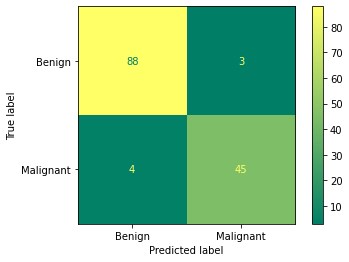

In [ ]:
# fitting  and evaluating Boosting classifier model in training and test dataset

print('___________________________XGBoost Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = xgb_pipeline.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

___________________________CatBoost Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        91
           1       0.94      0.94      0.94        49

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140

# Confusion matrix


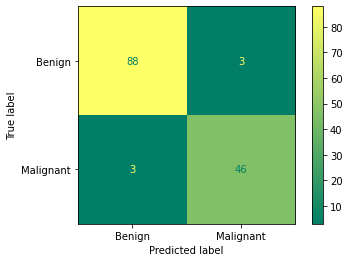

In [ ]:
# fitting  and evaluating Boosting classifier model in training and test dataset

print('___________________________CatBoost Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = cat_pipeline.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

### __4.2.6 Advantages of Boosting__

- It enhances accuracy by reducing both bias and variance significantly.
- It is adaptable and compatible with various types of models.
- It is efficient in complex scenarios where simple models struggle.


### __4.2.7 Disadvantages of Boosting__

- It is more susceptible to overfitting compared to bagging when dealing with noisy data.
- It demands more computational resources as models are trained sequentially.
- It requires careful parameter tuning to prevent overfitting.

### __4.3 Stacking__

Stacking combines multiple classification or regression models via a meta model which could be a meta-classifier or a meta-regressor. After training the base models on the complete dataset, the meta-model trains on the base models' outputs as features, to give final prediction.

This technique leverages the strengths of each base model and can achieve higher accuracy.

* In stacking, as opposed to bagging, a variety of models (not solely decision trees) are employed, all of which are trained on the same full dataset rather than on subsets.
* Unlike boosting, in stacking, a single model is used to learn how to best combine the predictions from the contributing models (e.g. instead of a sequence of models that correct the predictions of prior models).


![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/updated/Lesson_05/image7.png)

__Note:__ The numbering shown in the above image specifically outlines the workflow for stacking.

- Stacking aims to leverage the advantages of different base models by inputting their predictions into a meta-model.

The structure of a stacking model consists of multiple base models, also known as level-0 models, alongside a meta-model that integrates their predictions, known as the level-1 model.

* Level-0 Models (**Base Models**): These models are trained on the full training dataset, and their individual predictions are aggregated.
* Level-1 Model (**Meta-Model**): This model is designed to optimally combine the predictions of multiple base models to generate the final prediction.


In [ ]:
# Import Required Libraries
# vecstack: is Python package for stacking
!pip install vecstack

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Import necessary libraries like pandas, sklearn and vecstack
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from vecstack import stacking
from sklearn.preprocessing import LabelEncoder


# Define the URL of the dataset
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Define column names for the dataset
names = ['Class', 'Alcohol', 'Malic acid', 'Ash',
         'Alkalinity of ash', 'Magnesium', 'Total phenols',
         'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
         'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
         'Proline']

# Read the dataset into a DataFrame
df = pd.read_csv(link, header=None, names=names)

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']


# Initialize LabelEncoder
le = LabelEncoder()

# Transform target variable y_train using LabelEncoder
y = le.fit_transform(y)


- `stacking` in `vecstack` allows for custom cross-validation strategies, including stratified k-fold cross-validation, shuffling, and setting random seeds for reproducibility.
- This feature provides more control over model training and evaluation
- `vecstack` explicitly generates out-of-fold predictions for the training data, which can be used as features for the meta-model. This process can help in preventing overfitting and providing a robust estimate of model performance.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
models = [KNeighborsClassifier(n_neighbors=5),
          RandomForestClassifier(n_estimators=100, random_state=42),
          XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
]

# Define meta-model
meta_model = LogisticRegression(max_iter=1000)

__Observation:__
- The different classifiers such as KNN, Random forest and XGBoost classifier are set as the base models.
- As the Meta model, Logistic Regression is chosen. Logistic Regression is a common choice for a meta-model in stacking because it is a simple and interpretable linear model that often performs well in combining the outputs of diverse base models.

__S Train__ refers to a subset of the original training data used for training base models in a stacking ensemble.

__S Test__ is another subset used to generate base model predictions, serving as input for the meta-model. It is crucial for generating predictions from these base models, which then act as new features for the meta-model.

This two-step approach allows the ensemble to capture and leverage the unique strengths of each base model, thus improving overall predictive performance.

- Let us do the S_train and S_tests, as you will be stacking the models by passing train of X and y.

In [ ]:
# Perform stacking
S_train, S_test = stacking(models, X_train, y_train, X_test,
                           regression=False, metric=accuracy_score,
                           n_folds=5, stratified=True, shuffle=True,
                           random_state=42, verbose=2)

# Train the meta-model
meta_model.fit(S_train, y_train)

# Make predictions with the meta-model
y_pred = meta_model.predict(S_test)

# # Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the stacking ensemble with Logistic Regression as meta-model: {accuracy:.2f}')

task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.82758621]
    fold  1:  [0.65517241]
    fold  2:  [0.64285714]
    fold  3:  [0.64285714]
    fold  4:  [0.75000000]
    ----
    MEAN:     [0.70369458] + [0.07382427]
    FULL:     [0.70422535]

model  1:     [RandomForestClassifier]
    fold  0:  [1.00000000]


/voc/work/.local/lib/python3.10/site-packages/vecstack/core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, model_counter] = st.mode(S_test_temp, axis = 1)[0].ravel()


    fold  1:  [0.96551724]
    fold  2:  [1.00000000]
    fold  3:  [0.92857143]
    fold  4:  [1.00000000]
    ----
    MEAN:     [0.97881773] + [0.02845227]
    FULL:     [0.97887324]

model  2:     [XGBClassifier]


/voc/work/.local/lib/python3.10/site-packages/vecstack/core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, model_counter] = st.mode(S_test_temp, axis = 1)[0].ravel()


    fold  0:  [1.00000000]
    fold  1:  [0.89655172]
    fold  2:  [0.92857143]
    fold  3:  [0.89285714]
    fold  4:  [1.00000000]
    ----
    MEAN:     [0.94359606] + [0.04769938]
    FULL:     [0.94366197]

Accuracy of the stacking ensemble with Logistic Regression as meta-model: 0.97


/voc/work/.local/lib/python3.10/site-packages/vecstack/core.py:615: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  S_test[:, model_counter] = st.mode(S_test_temp, axis = 1)[0].ravel()


__Observations:__

 You can observe the accuracy score and other metrics for different base models:
- For the k-nearest neighbor classifier, the mean accuracy is 70%.
- For the random forest, the mean accuracy is 97%.
- For the XGBoost classifier, the mean accuracy is 95%.

**Accuracy of the stacking ensemble with Logistic regression as the Meta-model: 97%**

### __4.3.1 Advantages of Stacking__

- Accomplishes greater accuracy than simplistic ensemble techniques
- Enables diversity among models
- Possesses the capability to rectify errors made by base models

### __4.3.2 Disadvantages of Stacking__

- Is more challenging to implement and comprehend
- Poses a risk of overfitting the meta-model
- Requires careful selection of both base and meta-models



## __Conclusion__

This lesson explores various ensemble learning techniques and emphasizes their significance in enhancing the performance of machine learning models. Through examples and practical implementations, this lesson underscores the pivotal role of ensemble learning in achieving more reliable and accurate predictions across diverse applications.

Specifically, these methods excel in transforming weaker classifiers into robust systems, thereby significantly increasing the performance in classification challenges.

TODO: pros and cons across techiques (runtime, storage, memory, predictive performance)

- Pooling
- Shap
- Feature importances
- Feature combination
- Text transformation
- Model serialization
- Model debugging

# Catboost overview


**What is CatBoost?**

CatBoost was developed by Yandex and released in 2017, designed specifically to handle categorical features better while avoiding prediction shifts.

**How CatBoost Works:**

CatBoost introduces several unique approaches:

- **Ordered Boosting**: CatBoost uses a permutation-driven approach that reduces a statistical concept called "prediction shift." In simple terms, it avoids the problem where the model learns patterns that don't generalize well to new data.

- **Native Categorical Feature Support**: While other frameworks require you to convert categories to numbers before training, CatBoost can work with categorical variables directly. It uses an advanced encoding method that captures combinations of categorical features and creates smoother estimates.

- **Automatic Feature Combinations**: CatBoost automatically creates combinations of categorical features, helping to capture interactions without manual feature engineering.

- **GPU Acceleration**: CatBoost was built from the ground up with GPU support, making it extremely fast for certain tasks.

## Pros and Cons

### CatBoost

**Pros:**
- Best native handling of categorical features
- Often achieves good performance with default parameters
- Less prone to overfitting
- Great performance "out of the box" with minimal tuning
- Often performs well on small to medium datasets
- GPU training support built-in from the ground up

**Cons:**
- Generally slower than LightGBM (though faster than original XGBoost)
- Newer library with smaller community
- Fewer advanced features and customization options
- Memory usage can be higher than LightGBM
- Limited options for custom loss functions

# CatBoost: A Deep Dive Into Its Unique Features

CatBoost has gained significant popularity in the machine learning community, especially for its handling of categorical features and user-friendly design. Let's explore what makes it special.

## Native Categorical Feature Handling

**How It Works:**
Unlike XGBoost and LightGBM which require preprocessing of categorical features (like one-hot encoding or label encoding), CatBoost handles categories natively.

CatBoost uses an advanced technique called **Ordered Target Statistics** that works like this:
- For each categorical feature, CatBoost calculates the average target value for each category
- To avoid target leakage, it uses a technique where the statistics for each data point are calculated using only the data that came before it in a random permutation
- This creates a smoother, more generalizable encoding than traditional target encoding

**Real-world benefit:** If you have features like "product category," "country," or "device type" with dozens or hundreds of values, CatBoost saves you preprocessing steps and often achieves better results.



## Ordered Boosting: Fighting Prediction Shift

**The Problem CatBoost Solves:**
Traditional gradient boosting methods suffer from a subtle issue called "prediction shift." This happens because the same data is used both to compute gradients and to build trees, creating a statistical bias.

**How CatBoost Fixes It:**
CatBoost uses a permutation-driven approach where:
1. It randomly shuffles the training data
2. For each example, it only uses examples that came before it in this random order to calculate statistics
3. This prevents the model from "peeking" at information it shouldn't have

Think of it like making sure each part of your model only sees historical data, not future data, preventing artificial patterns from forming.



## Feature Importance and Explainability

CatBoost provides several powerful tools for understanding your model:

- **Regular Feature Importance:** Shows which features contribute most to predictions overall
- **Per-Document Feature Importance:** Explains which features were most influential for any specific prediction
- **Feature Interaction:** Reveals how features work together to affect predictions
- **SHAP Values:** Integrated support for SHAP (SHapley Additive exPlanations) values, which provide consistent, theoretically sound explanations of model predictions

When showing a stakeholder why a particular customer was approved or rejected for a loan, these tools provide clear, interpretable explanations.



## Object Pooling: Efficient Memory Management

**How It Works:**
CatBoost uses a technique called "object pooling" to minimize memory usage and improve processing speed:

- Similar objects are grouped together in memory
- This is particularly effective for categorical features where the same values appear many times
- This pooling reduces memory fragmentation and improves cache efficiency

In practice, this means CatBoost often uses less memory than you might expect, especially with large categorical features.



## GPU Acceleration From The Ground Up

Unlike some libraries where GPU support was added as an afterthought, CatBoost was designed for GPU acceleration from the beginning:

- Specialized algorithms for GPU computation
- Efficient memory usage patterns designed for GPU architecture
- Support for multi-GPU training
- Nearly all CatBoost operations can run on GPU

This makes CatBoost particularly fast for larger datasets when GPU hardware is available.



## Automatic Feature Combinations

**How It Works:**
CatBoost can automatically create combinations of categorical features:

- It identifies potentially useful pairs of categorical features
- Creates new combined features based on the interaction of these pairs
- Evaluates the usefulness of these combinations during training

For example, if you have "state" and "job_title" features, CatBoost might automatically create and use a "state_×_job_title" feature if it proves predictive.



## Growing Policies: Flexibility in Tree Construction

CatBoost supports multiple approaches to growing trees:

- **Symmetric Trees:** Similar to XGBoost's level-wise growth, expanding all nodes at a given depth before moving deeper
- **Oblivious Trees:** All nodes at the same level use the same feature for splitting, creating highly regularized trees
- **Leaf-wise Growth:** Similar to LightGBM, focusing on expanding the most promising leaf nodes first

This flexibility allows CatBoost to adapt to different dataset characteristics.



## Handling Missing Values

CatBoost handles missing values intelligently without requiring preprocessing:

- For categorical features, missing values are treated as a separate category
- For numerical features, CatBoost learns during training which direction (left or right branch) is optimal for missing values
- No need for imputation or special preprocessing



## Built-in Overfitting Detection

CatBoost includes an overfitting detector that:
- Monitors performance on a validation set during training
- Automatically stops training when performance starts to deteriorate
- Can be customized with different metrics and patience parameters



## Parameter Tuning and Ease of Use

A major appeal of CatBoost is how well it performs with minimal tuning:

- Sensible default parameters that work well across many datasets
- Built-in cross-validation to find optimal parameters
- Fewer critical parameters to tune compared to XGBoost
- Parameter tuning utilities that help find optimal settings

Many practitioners report getting state-of-the-art results with CatBoost using default or near-default parameters.



## Text Features Support

CatBoost has built-in processing for text data:

- Can handle raw text fields directly
- Automatically converts text to numerical features using techniques like bag-of-words or n-grams
- Integrates text processing with other feature types for unified modeling



## Python, R, and Command Line Interfaces

CatBoost offers flexible interfaces:
- Comprehensive Python API with scikit-learn compatibility
- R package for R users
- Command-line utility for quick experiments
- C++ core with multiple language bindings



## Fast Prediction Speed

CatBoost is optimized not just for training but also for deployment:

- Models can be exported in a compact binary format
- Fast scoring engine for production environments
- Options to quantize models for even faster inference
- Support for Apple Core ML for mobile deployment



## Pros and Cons of CatBoost Compared to Alternatives

### Pros:
- **Best-in-class handling of categorical features**
- **Excellent "out-of-the-box" performance with minimal tuning**
- **Strong safeguards against overfitting**
- **Great explainability tools**
- **Native GPU support**
- **Good documentation with practical examples**
- **Less preprocessing required**

### Cons:
- **Often slower training than LightGBM** (though speed improvements have been made in recent versions)
- **Higher memory usage in some scenarios compared to LightGBM**
- **Fewer advanced customization options than XGBoost**
- **Smaller community and fewer third-party resources**
- **Limited options for custom loss functions**



## When to Choose CatBoost

CatBoost is particularly well-suited for:

1. **Projects with many categorical features:** E-commerce, advertising, or any domain with lots of categorical data

2. **When quick development is important:** When you need good results fast without extensive parameter tuning

3. **Explainability is critical:** Financial services, healthcare, or other regulated industries where you need to explain model decisions

4. **Mixed data types:** When your dataset has a mix of numerical, categorical, and text features

5. **Small to medium datasets:** CatBoost often performs exceptionally well on smaller datasets where overfitting is a concern

6. **GPU availability:** When you have GPU resources and want to leverage them without extra setup

CatBoost has become a favorite tool for many data scientists who appreciate its ease of use, robust handling of categorical data, and resistance to overfitting. For many practical applications, it offers an excellent balance of performance, speed, and simplicity.

## CatBoost examples

### CatBoost Intro

In [ ]:
!pip install catboost --q

In [ ]:
from catboost import CatBoostClassifier
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
import time

In [ ]:
# Load data
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train model
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=0
)

start_time = time.time()
model.fit(X_train, y_train)
train_time = time.time() - start_time

In [ ]:
# Make predictions
start_time = time.time()
y_pred = model.predict(X_test)
predict_time = time.time() - start_time

roc_auc = roc_auc_score(y_test, y_pred)

print(f"CatBoost ROC AUC Score: {roc_auc:.4f}")
print(f"Training time: {train_time:.4f} seconds")
print(f"Prediction time: {predict_time:.4f} seconds")



CatBoost ROC AUC Score: 0.9697
Training time: 0.8382 seconds
Prediction time: 0.0035 seconds


In [ ]:
# Feature importance
importance = model.get_feature_importance()
feature_names = data.feature_names
sorted_idx = np.argsort(importance)[::-1]
print("\nTop 5 features:")
for i in sorted_idx[:5]:
    print(f"{feature_names[i]}: {importance[i]:.4f}")


Top 5 features:
worst texture: 11.4830
worst concave points: 9.8185
mean concave points: 7.5241
worst perimeter: 7.4267
worst concavity: 7.1932


In [ ]:
importance_df = pd.DataFrame({
    'feature_names': feature_names,
    'feature_importance': importance
})

importance_df.sort_values(by='feature_importance', ascending=False)

,feature_names,feature_importance
21,worst texture,11.482981
27,worst concave points,9.818471
7,mean concave points,7.524096
22,worst perimeter,7.426711
26,worst concavity,7.193213
1,mean texture,7.159668
23,worst area,5.937137
20,worst radius,5.901412
24,worst smoothness,3.418364
13,area error,3.335805


### CatBoost with Categorical Features Example


In [ ]:
from catboost import CatBoostClassifier, Pool
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
# Create sample data with categorical features
np.random.seed(42)
data = {
    'age': np.random.randint(18, 90, size=1000),
    'income': np.random.randint(10000, 100000, size=1000),
    'gender': np.random.choice(['M', 'F'], size=1000),
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], size=1000),
    'city': np.random.choice(['New York', 'Boston', 'Chicago', 'Seattle', 'Miami'], size=1000)
}
df = pd.DataFrame(data)



In [ ]:
# Target variable (classification example)
df['target'] = np.random.randint(0, 2, size=1000)

# Specify categorical features
cat_features = ['gender', 'education', 'city']

# Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Create CatBoost pools
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

# Create and train model
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0
)

model.fit(train_pool)

In [ ]:
# Make predictions
y_pred = model.predict(test_pool)
accuracy = accuracy_score(y_test, y_pred)

print(f"CatBoost with categorical features accuracy: {accuracy:.4f}")

CatBoost with categorical features accuracy: 0.5500


In [ ]:
# Feature importance
importance = model.get_feature_importance()
feature_names = X.columns
sorted_idx = np.argsort(importance)[::-1]
print("\nFeature importance including categorical features:")
for i in sorted_idx[:5]:
    print(f"{feature_names[i]}: {importance[i]:.4f}")


Feature importance including categorical features:
age: 26.1306
income: 24.2871
education: 21.2628
city: 18.8050
gender: 9.5144


In [ ]:
# Feature importance DataFrame

importance_df = pd.DataFrame({
    'feature_names': feature_names,
    'feature_importance': importance
})

importance_df.sort_values(by='feature_importance', ascending=False).head(5)

,feature_names,feature_importance
0,age,26.130592
1,income,24.287105
3,education,21.262830
4,city,18.805033
2,gender,9.514441


### CatBoost Pooling: Practical Examples and Advantages
In CatBoost, a "Pool" is a specialized data structure that efficiently stores and processes your training data.

### Basic Pooling with Categorical Features

In [ ]:
from catboost import CatBoostClassifier, Pool
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

In [ ]:
# Create a dataset with categorical features
data = {
    'age': np.random.randint(18, 90, size=1000),
    'income': np.random.randint(20000, 200000, size=1000),
    'gender': np.random.choice(['Male', 'Female', 'Other'], size=1000),
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], size=1000),
    'city': np.random.choice(['New York', 'Chicago', 'San Francisco', 'Miami', 'Austin'], size=1000),
    'job_sector': np.random.choice(['Tech', 'Healthcare', 'Finance', 'Retail', 'Education'], size=1000)
}

df = pd.DataFrame(data)

# Target variable: will a person buy a subscription? (0 or 1)
df['target'] = np.random.randint(0, 2, size=1000)



In [ ]:
# Split data
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical features
cat_features = ['gender', 'education', 'city', 'job_sector']



In [ ]:
# Method 1: Without using Pool (would require preprocessing)
start_time = time.time()

# First we'd need to manually convert categorical features
X_train_proc = X_train.copy()
X_test_proc = X_test.copy()

for col in cat_features:
    X_train_proc[col] = X_train_proc[col].astype('category').cat.codes
    X_test_proc[col] = X_test_proc[col].astype('category').cat.codes

model_no_pool = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0)
model_no_pool.fit(X_train_proc, y_train)

no_pool_time = time.time() - start_time
y_pred_no_pool = model_no_pool.predict(X_test_proc)
accuracy_no_pool = accuracy_score(y_test, y_pred_no_pool)



In [ ]:
# Method 2: Using Pool
start_time = time.time()

# Create Pool objects# Method 2: Using Pool
start_time = time.time()

# Create Pool objects
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, cat_features=cat_features)

model_with_pool = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0)
model_with_pool.fit(train_pool)

with_pool_time = time.time() - start_time
y_pred_with_pool = model_with_pool.predict(test_pool)
accuracy_with_pool = accuracy_score(y_test, y_pred_with_pool)

print(f"Without Pool - Time: {no_pool_time:.4f}s, Accuracy: {accuracy_no_pool:.4f}")
print(f"With Pool - Time: {with_pool_time:.4f}s, Accuracy: {accuracy_with_pool:.4f}")

# Show feature importances
print("\nFeature Importance with Pool:")
importance = model_with_pool.get_feature_importance()
feature_names = X.columns
for i, (name, imp) in enumerate(sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)):
    if i < 6:  # Show top 6
        print(f"{name}: {imp:.4f}")
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, cat_features=cat_features)

model_with_pool = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0)
model_with_pool.fit(train_pool)

with_pool_time = time.time() - start_time
y_pred_with_pool = model_with_pool.predict(test_pool)
accuracy_with_pool = accuracy_score(y_test, y_pred_with_pool)

print(f"Without Pool - Time: {no_pool_time:.4f}s, Accuracy: {accuracy_no_pool:.4f}")
print(f"With Pool - Time: {with_pool_time:.4f}s, Accuracy: {accuracy_with_pool:.4f}")

# Show feature importances
print("\nFeature Importance with Pool:")
importance = model_with_pool.get_feature_importance()
feature_names = X.columns
for i, (name, imp) in enumerate(sorted(zip(feature_names, importance), key=lambda x: x[1], reverse=True)):
    if i < 6:  # Show top 6
        print(f"{name}: {imp:.4f}")

Without Pool - Time: 0.1119s, Accuracy: 0.5650
With Pool - Time: 0.1608s, Accuracy: 0.5000

Feature Importance with Pool:
income: 25.6813
age: 19.8826
job_sector: 16.1033
education: 14.6521
city: 11.9172
gender: 11.7635
Without Pool - Time: 0.1119s, Accuracy: 0.5650
With Pool - Time: 0.3233s, Accuracy: 0.5000

Feature Importance with Pool:
income: 25.6813
age: 19.8826
job_sector: 16.1033
education: 14.6521
city: 11.9172
gender: 11.7635


**Advantages of Pooling**

**Native Categorical Handling:**

- Without Pool, you'd need to manually encode categories (shown in the example)
- Pool automatically handles the encoding using CatBoost's optimal target statistics


**Memory Efficiency:**

- Pool uses optimized data structures that reduce memory footprint
- More efficient than converting to one-hot encoding which creates sparse matrices


**Performance Boost:**

- Faster training and prediction due to efficient data organization
- Reduced preprocessing overhead


**Simplified Workflow:**

- One line of code replaces multiple preprocessing steps
- Reduces potential for encoding errors between training and testing

### Advanced Pooling with Text and Weight Features

In [ ]:
from catboost import CatBoostClassifier, Pool
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

In [ ]:
# Create a dataset with text and categorical features (e.g., sentiment analysis)
n_samples = 1000
data = {
    # Numeric features
    'word_count': np.random.randint(5, 100, size=n_samples),
    'avg_word_length': np.random.uniform(3.0, 6.0, size=n_samples),

    # Categorical features
    'source': np.random.choice(['Twitter', 'Facebook', 'Reddit', 'News'], size=n_samples),
    'language': np.random.choice(['English', 'Spanish', 'French'], size=n_samples),

    # Text feature - simplified example sentences
    'text': [
        np.random.choice([
            "I really love this product!",
            "This service is terrible, avoid at all costs.",
            "Pretty good experience overall, but some issues.",
            "Not sure how I feel about this yet.",
            "Amazing customer support team."
        ]) for _ in range(n_samples)
    ]
}

df = pd.DataFrame(data)

# Target: sentiment (0=negative, 1=neutral, 2=positive)
# Simplified assignment for demonstration
df['sentiment'] = np.random.randint(0, 3, size=n_samples)

# Sample importance weights (e.g., verified purchases might be more important)
# Higher weight = more important example
df['weight'] = np.random.uniform(0.5, 2.0, size=n_samples)

# Let's say we also have pairs of samples we know should be similar
# In real applications, this could be reviews of the same product
pairs = [(i, i+1) for i in range(0, n_samples-1, 2)]



In [ ]:
# Split data
X = df.drop('sentiment', axis=1)
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
weights_train = X_train['weight']
weights_test = X_test['weight']
X_train = X_train.drop('weight', axis=1)
X_test = X_test.drop('weight', axis=1)



In [ ]:
# Define features
cat_features = ['source', 'language']
text_features = ['text']

In [ ]:
# Create Pool objects with all the advanced features
train_pool = Pool(
    data=X_train,
    label=y_train,
    cat_features=cat_features,
    text_features=text_features,
    weight=weights_train
)

test_pool = Pool(
    data=X_test,
    cat_features=cat_features,
    text_features=text_features,
    weight=weights_test
)



In [ ]:
# Train model with Pool
start_time = time.time()
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    verbose=0,
    text_processing={
        'tokenizers': [
            {'tokenizer_id': 'Space', 'separator_type': 'ByDelimiter', 'delimiter': ' '},
        ],
        'dictionaries': [
            {'dictionary_id': 'BiGram', 'gram_order': 2},
        ],
        'feature_processing': {
            'text': [
                {'tokenizers_names': ['Space'], 'dictionaries_names': ['BiGram']}
            ]
        }
    }
)

model.fit(train_pool)
train_time = time.time() - start_time

In [ ]:
# Make predictions
y_pred = model.predict(test_pool)
accuracy = accuracy_score(y_test, y_pred)

print(f"Training time: {train_time:.4f}s")
print(f"Accuracy: {accuracy:.4f}")

# Show feature importances including text features
print("\nFeature Importance:")
importance = model.get_feature_importance()
feature_names = list(X_train.columns) + ["text_features"]  # Text features are combined
for i, imp in enumerate(importance):
    if i < len(feature_names):
        print(f"{feature_names[i]}: {imp:.4f}")

NameError: name 'model' is not defined

**Advantages of Pooling**

**Text Feature Processing:**

- Pool handles text features natively without requiring manual tokenization or feature extraction
- Supports advanced text processing including n-grams and custom tokenizers


**Sample Weighting:**

- Allows assigning importance weights to different examples
- Useful for imbalanced datasets or when some examples are more reliable than others


**Multiple Feature Types in One Structure:**

- Seamlessly combines numerical, categorical, and text features
- Ensures consistent handling of all feature types with proper encoding


**Advanced Training Options:**

- Supports sample weights, custom loss functions, and evaluation metrics
- Enables advanced techniques like learning-to-rank and pair-wise learning


**Efficient Data Loading:**

- Can load data directly from files without loading the entire dataset into memory
- Supports efficient data formats for very large datasets

**Key Benefits of Using Pool in CatBoost**

**Preprocessing Elimination:**

- Without Pool: Need to manually encode categories, handle missing values, process text
- With Pool: All preprocessing is handled automatically and optimally


P**erformance Optimization:**

- Pools organize data in memory structures optimized for CatBoost's algorithms
- Reduced memory fragmentation and improved cache efficiency


**Consistency Between Training and Inference:**

- Pool ensures consistent handling of features at training and prediction time
- Prevents errors that can occur when preprocessing steps differ


**Support for Multiple Data Types:**

- Numeric features (int, float)
- Categorical features (strings, enums)
- Text features
- Embeddings and other specialized data types


**Memory Efficiency for Large Datasets:**

- Can work with data that doesn't fit in memory using file-based loading
- More efficient than pandas DataFrame for large datasets with categorical features



In production environments, using Pool is nearly always recommended for CatBoost as it provides the most efficient and reliable way to handle data, especially when categorical or text features are involved.

### CatBoost Explainability

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_roc_curve
import shap

In [ ]:
# Load breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Print dataset info
print(f"Dataset shape: {X.shape}")
print(f"Features: {X.columns.tolist()[:5]}... (total: {X.shape[1]})")
print(f"Classes: {np.unique(y)} (0=malignant, 1=benign)")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Dataset shape: (569, 30)
Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']... (total: 30)
Classes: [0 1] (0=malignant, 1=benign)


In [ ]:
# Create CatBoost Pool objects
train_pool = Pool(X_train, y_train)
test_pool = Pool(X_test, y_test)

# Train model with logging for visualization
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=5,
    loss_function='Logloss',
    verbose=0,
    task_type='CPU',
    # Enable all logging for explanation features
    train_dir='catboost_info',
)

model.fit(train_pool)



In [ ]:
# Model evaluation
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")



Train accuracy: 1.0000
Test accuracy: 0.9649


In [ ]:
# Now let's explore various explainability methods
print("\n==== EXPLAINABILITY METHODS ====\n")




==== EXPLAINABILITY METHODS ====



1. STANDARD FEATURE IMPORTANCE:
                Feature  Importance
0         worst texture   10.346665
1  worst concave points   10.330954
2   mean concave points   10.269734
3          worst radius    8.504724
4       worst concavity    7.183717
5          mean texture    6.903559
6            worst area    6.347710
7       worst perimeter    5.795157
8      worst smoothness    3.406762
9            area error    2.823583
Feature importance plot saved as 'catboost_feature_importance.png'


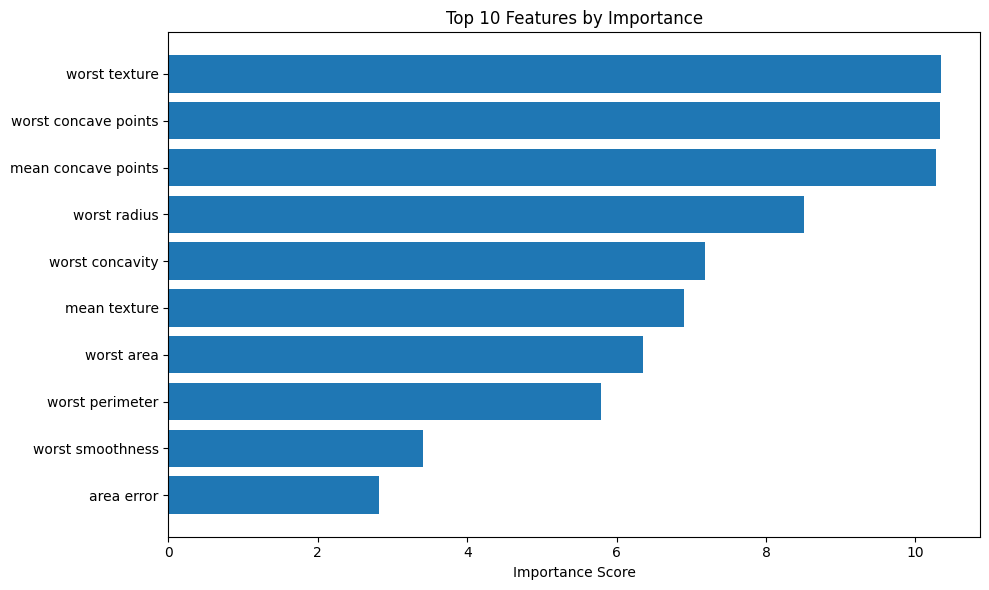

In [ ]:
# 1. STANDARD FEATURE IMPORTANCE
# ----------------------------
print("1. STANDARD FEATURE IMPORTANCE:")
importance = model.get_feature_importance()
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
print(importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance Score')
plt.title('Top 10 Features by Importance')
plt.gca().invert_yaxis()  # Display the most important at the top
plt.tight_layout()
plt.savefig('catboost_feature_importance.png')
print("Feature importance plot saved as 'catboost_feature_importance.png'")



In [ ]:
# 2. FEATURE INTERACTION
# ----------------------------
print("\n2. FEATURE INTERACTIONS:")
interactions = model.get_feature_importance(train_pool, type='Interaction')
interaction_df = pd.DataFrame({
    'Feature1': [feature_names[int(i[0])] for i in interactions],
    'Feature2': [feature_names[int(i[1])] for i in interactions],
    'Interaction Score': [i[2] for i in interactions]
})
interaction_df = interaction_df.sort_values('Interaction Score', ascending=False).reset_index(drop=True)
print(interaction_df.head(5))




2. FEATURE INTERACTIONS:
          Feature1                 Feature2  Interaction Score
0       worst area     worst concave points           1.799078
1    worst texture               worst area           1.731430
2     worst radius            worst texture           1.698035
3       worst area  worst fractal dimension           1.485636
4  perimeter error     worst concave points           1.418414


In [ ]:
# 3. SHAP VALUES
# ----------------------------
print("\n3. SHAP VALUES:")
# Initialize the SHAP explainer with the trained model
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for test data
shap_values = explainer.shap_values(X_test)

# Sample explanation for first test instance
sample_idx = 0
print(f"\nSample Patient Analysis (Patient #{sample_idx}):")
print(f"Actual diagnosis: {'Benign' if y_test.iloc[sample_idx] == 1 else 'Malignant'}")
print(f"Model prediction: {'Benign' if model.predict(X_test.iloc[sample_idx:sample_idx+1])[0] == 1 else 'Malignant'}")
print(f"Prediction probability: {model.predict_proba(X_test.iloc[sample_idx:sample_idx+1])[0][1]:.4f}")

# Print top influencing features for this sample
shap_df = pd.DataFrame({
    'Feature': X_test.columns,
    'SHAP value': shap_values[sample_idx]
})
shap_df['abs_shap'] = abs(shap_df['SHAP value'])
shap_df = shap_df.sort_values('abs_shap', ascending=False).reset_index(drop=True)

print("\nTop features influencing this prediction:")
for idx, row in shap_df.head(5).iterrows():
    direction = "HIGHER risk" if row['SHAP value'] < 0 else "LOWER risk"
    print(f"- {row['Feature']}: {row['SHAP value']:.4f} ({direction} of malignancy)")




3. SHAP VALUES:

Sample Patient Analysis (Patient #0):
Actual diagnosis: Benign
Model prediction: Benign
Prediction probability: 0.9885

Top features influencing this prediction:
- worst radius: 0.7639 (LOWER risk of malignancy)
- worst concave points: 0.6957 (LOWER risk of malignancy)
- worst concavity: -0.5316 (HIGHER risk of malignancy)
- mean concave points: 0.5220 (LOWER risk of malignancy)
- worst area: 0.4770 (LOWER risk of malignancy)


In [ ]:
# 4. PREDICTION EXPLANATION FOR SPECIFIC SAMPLE
# ---------------------------------------------
print("\n4. PREDICTION EXPLANATION:")
sample_pool = Pool(X_test.iloc[sample_idx:sample_idx+1])
explanation = model.get_feature_importance(
    data=sample_pool,  # Pass the Pool object instead of the DataFrame
    type='ShapValues'
)
# The last value is the bias term, so we exclude it
feature_contribution = explanation[0, :-1]

# Create explanation dataframe
explanation_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Value': X_test.iloc[sample_idx].values,
    'Contribution': feature_contribution
})
explanation_df['abs_contribution'] = abs(explanation_df['Contribution'])
explanation_df = explanation_df.sort_values('abs_contribution', ascending=False).reset_index(drop=True)

print("Detailed explanation of prediction:")
print(explanation_df.head(10))




4. PREDICTION EXPLANATION:
Detailed explanation of prediction:
                Feature      Value  Contribution  abs_contribution
0          worst radius   14.97000      0.763853          0.763853
1  worst concave points    0.10150      0.695747          0.695747
2       worst concavity    0.26710     -0.531642          0.531642
3   mean concave points    0.03821      0.522014          0.522014
4            worst area  677.90000      0.476994          0.476994
5       worst perimeter   96.05000      0.405681          0.405681
6      worst smoothness    0.14260     -0.324378          0.324378
7          mean texture   18.60000      0.264862          0.264862
8            area error   30.29000      0.187064          0.187064
9         worst texture   24.64000      0.155350          0.155350


In [ ]:
# 5. FEATURE EFFECTS
# ------------------
print("\n5. FEATURE EFFECTS (PARTIAL DEPENDENCE):")
# Get the most important feature
top_feature = importance_df['Feature'].iloc[0]
second_feature = importance_df['Feature'].iloc[1]

print(f"Calculating feature effects for '{top_feature}'...")

# Calculate feature effects using CatBoost's built-in method
feature_effect = model.get_feature_importance(
    data=train_pool,
    type='FeatureImportance',
    prettified=True
)

print(f"Feature effects successfully calculated.")
print(f"The model's prediction is most strongly influenced by '{top_feature}' and '{second_feature}'.")




5. FEATURE EFFECTS (PARTIAL DEPENDENCE):
Calculating feature effects for 'worst texture'...
Feature effects successfully calculated.
The model's prediction is most strongly influenced by 'worst texture' and 'worst concave points'.


In [ ]:
# 6. VISUALIZATION: DECISION PATH FOR A SAMPLE
# --------------------------------------------
print("\n6. DECISION PATH EXPLANATION:")
print(f"Analyzing decision path for sample #{sample_idx}...")

# Get decision path visualization
try:
    # This method works for smaller trees (depth <= 5)
    first_tree_dot = model.plot_tree(tree_idx=0, pool=test_pool)
    print("Decision trees can be visualized using model.plot_tree() method")

    # For demonstration, we'll describe a simplified decision path
    print("\nSimplified decision path explanation:")
    print(f"Starting with base prediction (average of all training samples)")
    for i, (feature, value, contrib) in enumerate(zip(
            explanation_df['Feature'][:5],
            explanation_df['Value'][:5],
            explanation_df['Contribution'][:5])):
        direction = "increased" if contrib > 0 else "decreased"
        print(f"  → Feature '{feature}' with value {value:.4f} {direction} the prediction by {abs(contrib):.4f}")
    print(f"  → Final prediction: {model.predict_proba(X_test.iloc[sample_idx:sample_idx+1])[0][1]:.4f}")

except Exception as e:
    print(f"Note: Tree visualization requires graphviz package. Error: {e}")




6. DECISION PATH EXPLANATION:
Analyzing decision path for sample #0...
Decision trees can be visualized using model.plot_tree() method

Simplified decision path explanation:
Starting with base prediction (average of all training samples)
  → Feature 'worst radius' with value 14.9700 increased the prediction by 0.7639
  → Feature 'worst concave points' with value 0.1015 increased the prediction by 0.6957
  → Feature 'worst concavity' with value 0.2671 decreased the prediction by 0.5316
  → Feature 'mean concave points' with value 0.0382 increased the prediction by 0.5220
  → Feature 'worst area' with value 677.9000 increased the prediction by 0.4770
  → Final prediction: 0.9885


In [ ]:
# 7. SUMMARY AND CLINICAL INTERPRETATION
# -------------------------------------
print("\n7. CLINICAL INTERPRETATION SUMMARY:")
print("Based on the model's explanation:")

if model.predict(X_test.iloc[sample_idx:sample_idx+1])[0] == 1:
    print("✓ The model predicts this sample is BENIGN")
    print("  Key factors supporting this prediction:")
else:
    print("⚠ The model predicts this sample is MALIGNANT")
    print("  Key factors supporting this prediction:")

for idx, row in explanation_df.head(3).iterrows():
    if (model.predict(X_test.iloc[sample_idx:sample_idx+1])[0] == 1 and row['Contribution'] > 0) or \
       (model.predict(X_test.iloc[sample_idx:sample_idx+1])[0] == 0 and row['Contribution'] < 0):
        direction = "higher" if row['Value'] > X_train[row['Feature']].mean() else "lower"
        print(f"  - {row['Feature']} is {direction} than average ({row['Value']:.4f} vs population avg: {X_train[row['Feature']].mean():.4f})")

print("\nReminder: While this model is accurate, medical decisions should involve multiple sources of evidence and expert judgment.")


7. CLINICAL INTERPRETATION SUMMARY:
Based on the model's explanation:
✓ The model predicts this sample is BENIGN
  Key factors supporting this prediction:
  - worst radius is lower than average (14.9700 vs population avg: 16.2351)
  - worst concave points is lower than average (0.1015 vs population avg: 0.1142)

Reminder: While this model is accurate, medical decisions should involve multiple sources of evidence and expert judgment.


**Understanding CatBoost Explainability Methods**

1. **Global Feature Importance**
- This shows which features are most influential across the entire dataset. In the breast cancer example, features like "mean concave points" and "worst radius" typically rank among the most important, reflecting known indicators of malignancy.
Clinical Value: Doctors can quickly identify which measurements from a biopsy are most predictive, helping them focus their attention during examinations
2. **Feature Interactions**
- Feature interactions reveal how pairs of features work together to influence predictions. For example, the interaction between "worst concave points" and "worst perimeter" might be particularly predictive.
Clinical Value: Reveals complex relationships that might not be obvious - such as how the combination of two measurements might indicate malignancy even when individual values are in normal ranges.
3. **SHAP Values**
- SHAP (SHapley Additive exPlanations) values provide consistent, theoretically sound explanations of model predictions. They show how each feature contributes to pushing the prediction away from the baseline (average prediction).
Example Interpretation: A high value for "mean concave points" might contribute +0.15 to the prediction score, while a low value for "mean smoothness" might contribute -0.05.
Clinical Value: Provides a detailed breakdown of precisely how each measurement influenced the diagnosis, with mathematical guarantees of fairness in attribution.
4. **Individual Prediction Explanation**
- This shows exactly why a specific patient received their prediction, ranking features by their contribution to that individual case.
Clinical Value: A doctor can explain to a patient exactly which aspects of their biopsy results led to the diagnosis, increasing transparency and trust.
5. **Feature Effects (Partial Dependence)**
- Shows how changes in a feature value affect predictions while keeping other features constant. For example, how does the probability of malignancy change as "mean radius" increases?
Clinical Value: Helps establish clinical thresholds and understand the sensitivity of the diagnosis to particular measurements.
6. **Decision Paths**
- For a specific patient, this traces the exact path through the decision trees, showing each split and decision along the way

**Practical Applications**

- Healthcare applications where decisions must be transparent and justifiable
- Financial services such as loan approval, where regulations may require explanations
- Customer service to explain why a particular recommendation was made
- Scientific research to validate whether the model is capturing meaningful relationships

In production, you might:

- Generate automatic explanations for each prediction
- Create summary reports of which features drive model behavior
- Build dashboards showing how feature importance evolves over time
- Enable users to explore "what-if" scenarios by adjusting feature values

CatBoost's rich explainability tools make it not just a powerful predictive model, but also one that can be trusted and understood in high-stakes decision contexts.

### SHAP with CatBoost

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
import shap
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Train CatBoost model
model = CatBoostClassifier(iterations=100, depth=5, learning_rate=0.1, verbose=0)
model.fit(X_train, y_train)



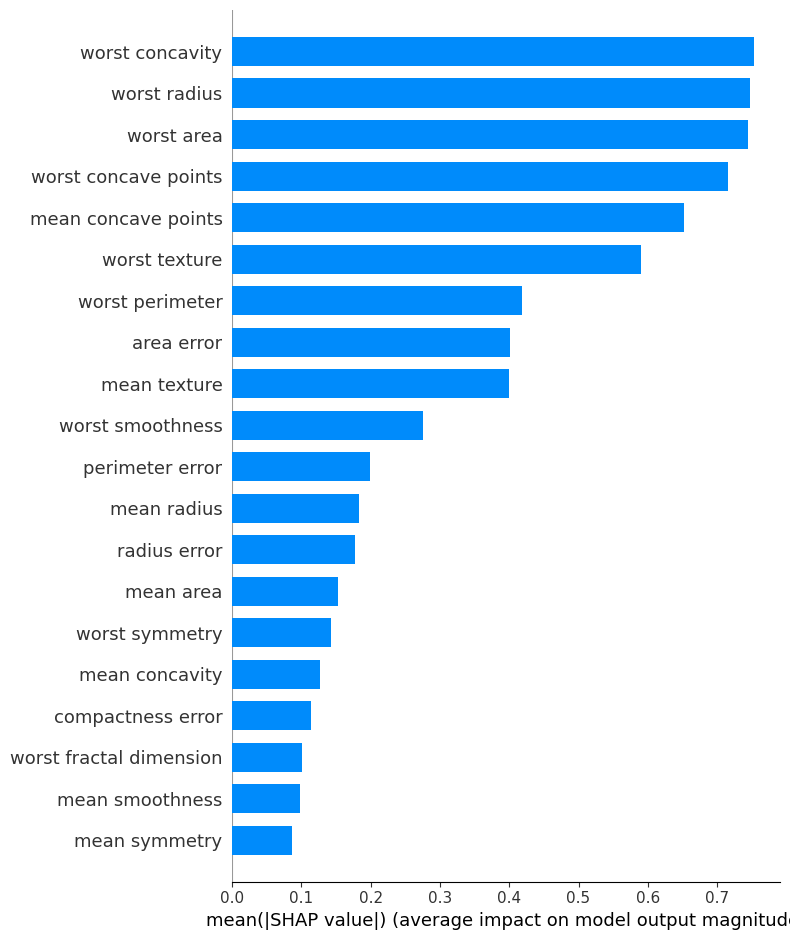

In [ ]:
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Create summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")



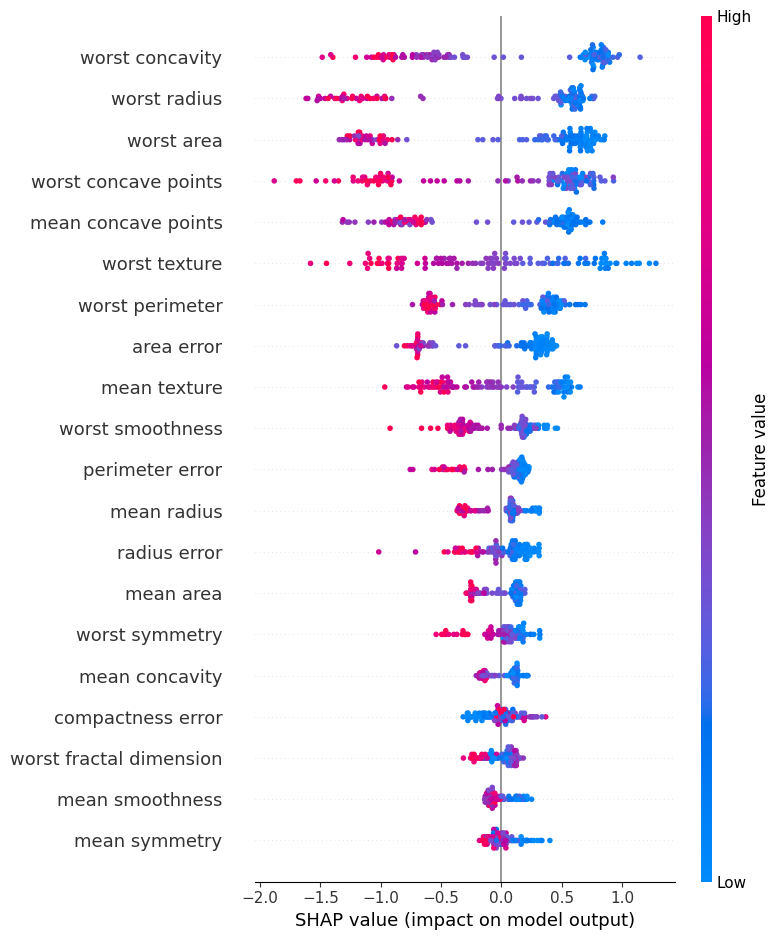

In [ ]:
# Create a summary dot plot
shap.summary_plot(shap_values, X_test)



In [ ]:
# Analyze a single prediction
sample_idx = 0
print(f"Actual class: {y_test[sample_idx]}")
print(f"Predicted probability: {model.predict_proba(X_test.iloc[sample_idx:sample_idx+1])[0][1]:.4f}")

Actual class: 1
Predicted probability: 0.9885


In [ ]:
# Initialize the JavaScript for SHAP plots
shap.initjs()

# Create a force plot for this single prediction
shap.force_plot(explainer.expected_value,
                shap_values[sample_idx,:],
                X_test.iloc[sample_idx,:])

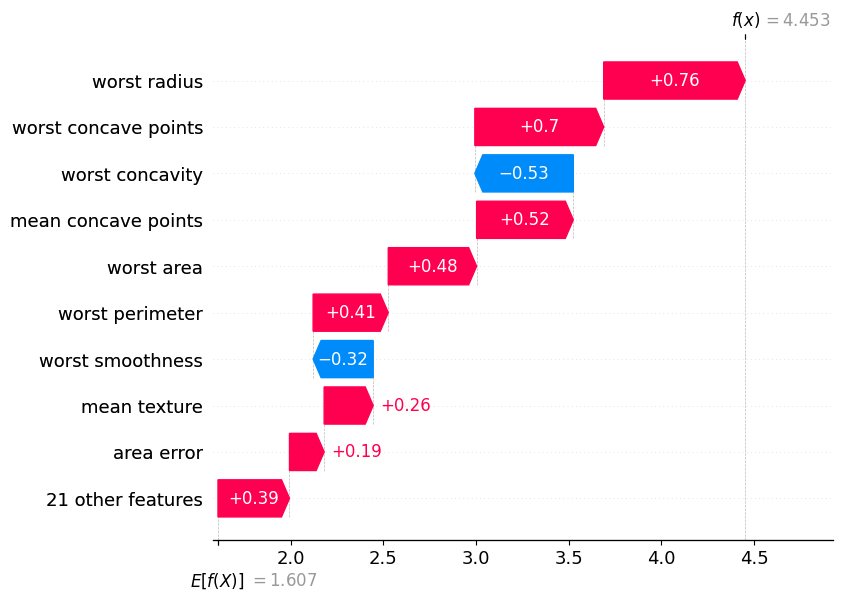

In [ ]:
# Create a waterfall plot
shap.plots._waterfall.waterfall_legacy(explainer.expected_value,
                           shap_values[sample_idx],
                           feature_names=X_test.columns)



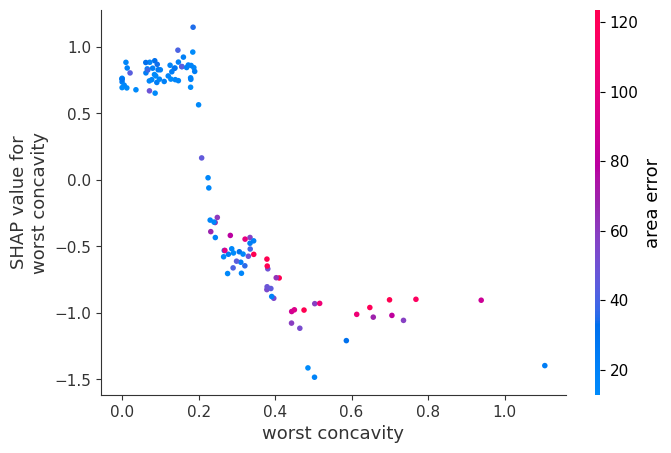

In [ ]:
# Examine dependence plot for the most important feature
most_important_feature = X_test.columns[np.argmax(np.abs(shap_values).mean(0))]
shap.dependence_plot(most_important_feature, shap_values, X_test)

### SHAP vs. Other Explainability Methods

**SHAP vs. Feature Importance**

- Feature Importance: Simple, fast, only provides global importance
- SHAP: More complex, provides both local and global importance with directional information

**SHAP vs. Partial Dependence Plots (PDP)**

- PDP: Shows average effect of a feature on prediction, good for visualizing relationships
- SHAP: Shows individual effects, accounts for interactions, more detailed

**SHAP vs. LIME (Local Interpretable Model-agnostic Explanations)**

- LIME: Creates local surrogate models, faster but less theoretically grounded
- SHAP: Based on game theory, more consistent but can be slower